Implement K-Nearest Neighbors (KNN) Classifier

In [2]:
import pandas as pd 

data = pd.read_csv('1) iris.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Data Processing

In [3]:
data['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [8]:
from sklearn.preprocessing import LabelEncoder
la = LabelEncoder()
data['species'] = la.fit_transform(data['species'])
data['species'].unique()

array([0, 1, 2])

Train Test Splitting

In [6]:
from sklearn.model_selection import train_test_split

X = data.iloc[:, :-1] 
y = data["species"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Normalising The Features

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

KNN Model 

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [16]:
def evaluate_knn(k_values):
    accuracies=[]
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train,y_train)
        y_pred = knn.predict(X_test)

        accuracy = accuracy_score(y_test,y_pred)
        accuracies.append(accuracy)
       
        # print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
        # print("Classification Report:\n", classification_report(y_test, y_pred))
        print(f"Accuracy: {accuracy:.4f}")
    return accuracies

k_values = [10,30,50,70,90]
accuracies = evaluate_knn(k_values)


Accuracy: 1.0000
Accuracy: 0.9667
Accuracy: 0.9333
Accuracy: 0.9000
Accuracy: 0.6667


Plot Accuracy 

In [17]:
import matplotlib.pyplot as plt

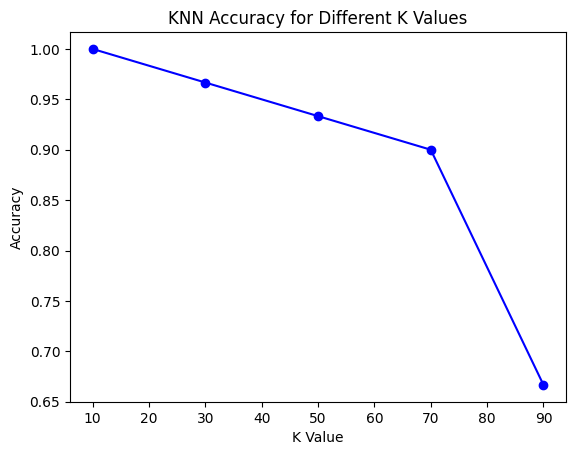

In [18]:
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy for Different K Values")
plt.show()